In [2]:
import sqlite3 
import pandas as pd

# Conectar al archivo de la base de datos existente
conexion = sqlite3.connect("./datos/sanoyfresco.db")

# Verificar que la conexión fue exitosa
cursor = conexion.cursor()
# cursor.execute("SELECT * FROM sqlite_master WHERE type='table';")
tablas = cursor.fetchall()

# Mostrar las tablas existentes
# print("Campos disponibles en la base de datos:")
for tabla in tablas:
    print(tabla[0])
    

# Mostrar las columnas de la tabla 'tickets'
cursor.execute("PRAGMA table_info(tickets);")
columnas = cursor.fetchall()

# Mostrar las columnas en formato legible
print("Columnas en la tabla 'tickets':")
for columna in columnas:
    print(f"Nombre: {columna[1]}, Tipo: {columna[2]}")
    

# cantidad_registros = pd.read_sql_query("""
#     SELECT COUNT(*) AS total_registros FROM tickets
# """, conexion)

# print("Número total de registros en la tabla:\n", cantidad_registros)

# conexion = sqlite3.connect("./datos/sanoyfresco.db")

# Verificar si hay datos en la columna precio_total
# verificar_datos = pd.read_sql_query("""
#     SELECT COUNT(*) AS registros_no_nulos
#     FROM tickets
#     WHERE precio_total IS NOT NULL
# """, conexion)

# print(f"📊 Registros con datos en precio_total: {verificar_datos['registros_no_nulos'][0]}")




# Cerrar la conexión
conexion.close()



Columnas en la tabla 'tickets':
Nombre: id_pedido, Tipo: INTEGER
Nombre: id_cliente, Tipo: INTEGER
Nombre: fecha, Tipo: TIMESTAMP
Nombre: hora, Tipo: INTEGER
Nombre: id_departamento, Tipo: INTEGER
Nombre: id_seccion, Tipo: INTEGER
Nombre: id_producto, Tipo: INTEGER
Nombre: nombre_producto, Tipo: TEXT
Nombre: precio_unitario, Tipo: REAL
Nombre: cantidad, Tipo: INTEGER
Nombre: precio_total, Tipo: REAL


# **Insights**

### **1. ¿Cuál es el ingreso total generado por el negocio?**

In [25]:
import sqlite3
import pandas as pd

# Conexión a la base de datos
conexion = sqlite3.connect("./datos/sanoyfresco.db")

total_ventas = pd.read_sql_query("""
    SELECT SUM(precio_total) AS ingreso_total FROM tickets
""", conexion)
print(f"💰 Ingreso total generado por el negocio: {total_ventas['ingreso_total'][0]:,.2f}")

# Cerrar la conexión
conexion.close()


💰 Ingreso total generado por el negocio: 39,854,875.32


### **2. ¿Cómo ha sido la tendencia de ingresos mensuales?**


In [26]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")


tendencia_ventas = pd.read_sql_query("""
    SELECT strftime('%Y-%m', fecha) AS mes, SUM(precio_total) AS ingresos_mensuales
    FROM tickets
    GROUP BY mes
    ORDER BY mes
""", conexion)
print("\n📅 Tendencia de ingresos mensuales:")
tendencia_ventas.to_excel("tendencia_ventas.xlsx", index=False)

conexion.close()


📅 Tendencia de ingresos mensuales:


### **3. ¿Cuál es el rendimiento de cada departamento en términos de ventas?**


In [27]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

ingresos_departamento = pd.read_sql_query("""
    SELECT id_departamento, SUM(precio_total) AS ingresos
    FROM tickets
    GROUP BY id_departamento
    ORDER BY ingresos DESC
""", conexion)
print("\n🏢 Ingresos por departamento:")
ingresos_departamento.to_excel("ingresos_departamento.xlsx", index=False)

conexion.close()


🏢 Ingresos por departamento:


### **4. ¿Cómo se distribuyen las ventas entre las diferentes secciones?**


In [28]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

ventas_seccion = pd.read_sql_query("""
    SELECT id_seccion, SUM(precio_total) AS ingresos
    FROM tickets
    GROUP BY id_seccion
    ORDER BY ingresos DESC
""", conexion)
print("\n📊 Distribución de ventas por sección:")
print(ventas_seccion)

conexion.close()



📊 Distribución de ventas por sección:
   id_seccion     ingresos
0          24  20879374.69
1         123   8634823.85
2          83   7237312.87
3          67    946220.85
4          53    821420.62
5          84    707934.15
6         115    376048.00
7          16    251740.29


### **5. ¿Cuáles son los 10 productos más vendidos en cantidad?**

In [29]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

productos_mas_vendidos = pd.read_sql_query("""
    SELECT nombre_producto, SUM(cantidad) AS total_vendido
    FROM tickets
    GROUP BY nombre_producto
    ORDER BY total_vendido DESC
    LIMIT 10
""", conexion)
print("\n🏆 Top 10 productos más vendidos en cantidad:")
productos_mas_vendidos.to_excel("productos_mas_vendidos.xlsx", index=False)


conexion.close()



🏆 Top 10 productos más vendidos en cantidad:


### **6. ¿Cuáles son los 10 productos que generan más ingresos?**


In [30]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

productos_mas_ingresos = pd.read_sql_query("""
    SELECT nombre_producto, SUM(precio_total) AS ingresos
    FROM tickets
    GROUP BY nombre_producto
    ORDER BY ingresos DESC
    LIMIT 10
""", conexion)
print("\n💰 Top 10 productos que generan más ingresos:")
productos_mas_ingresos.to_excel("productos_mas_ingresos.xlsx", index=False)


conexion.close()



💰 Top 10 productos que generan más ingresos:


### **7. ¿Quiénes son los 20 clientes que más compran en términos de ingresos?**


In [31]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

clientes_top = pd.read_sql_query("""
    SELECT id_cliente, SUM(precio_total) AS total_compras
    FROM tickets
    GROUP BY id_cliente
    ORDER BY total_compras DESC
    LIMIT 20
""", conexion)
print("\n👥 Top 20 clientes con mayores compras (en ingresos):")
clientes_top.to_excel("clientes_top.xlsx", index=False)

conexion.close()



👥 Top 20 clientes con mayores compras (en ingresos):


### **8. ¿Cuál es la compra media por cliente?**


In [32]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

compra_media_cliente = pd.read_sql_query("""
    SELECT SUM(precio_total) / COUNT(DISTINCT id_cliente) AS compra_media
    FROM tickets
""", conexion)

print(f"\n💸 Compra media por cliente: {compra_media_cliente['compra_media'][0]:.2f}")

conexion.close()


💸 Compra media por cliente: 219.10


### **9. ¿Cuántos pedidos totales se han realizado?**


In [33]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

total_pedidos = pd.read_sql_query("""
    SELECT COUNT(DISTINCT id_pedido) AS total_pedidos
    FROM tickets
""", conexion)
print(f"\n📦 Total de pedidos realizados: {total_pedidos['total_pedidos'][0]}")

conexion.close()



📦 Total de pedidos realizados: 2060188


### **10.  ¿Cuál es el valor promedio por pedido?**

In [34]:
conexion = sqlite3.connect("./datos/sanoyfresco.db")

valor_promedio_pedido = pd.read_sql_query("""
    SELECT AVG(precio_total_pedido) AS valor_promedio
    FROM (
        SELECT id_pedido, SUM(precio_total) AS precio_total_pedido
        FROM tickets
        GROUP BY id_pedido
    )
""", conexion)

# Verificar el resultado
if valor_promedio_pedido['valor_promedio'][0] is not None:
    print(f"\n💵 Valor promedio por pedido: {valor_promedio_pedido['valor_promedio'][0]:.2f}")
else:
    print("⚠️ No hay datos disponibles en la columna 'precio_total'.")

conexion.close()



💵 Valor promedio por pedido: 19.35


C:\Users\samue\AppData\Local\Temp\ipykernel_16704\1043109630.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\samue\AppData\Local\Temp\ipykernel_16704\1043109630.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\samue\AppData\Local\Temp\ipykernel_16704\1043109630.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\samue\AppData\Local\Temp\ipykernel_16704\1043109630.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `h

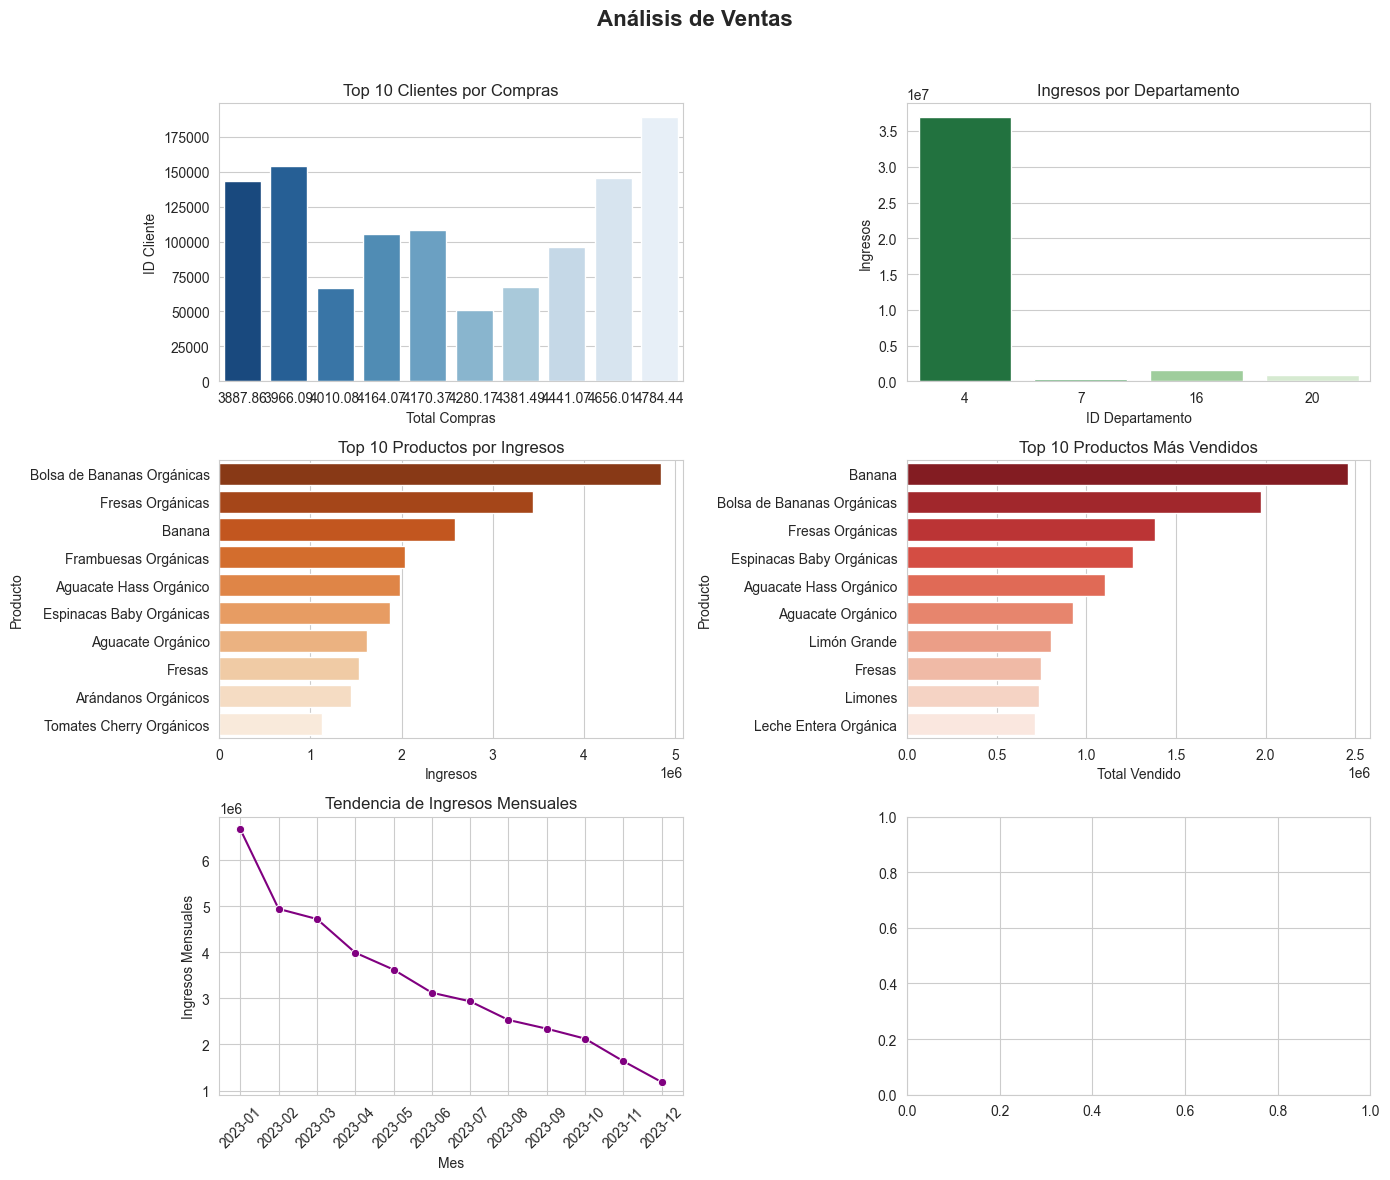

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las rutas de los archivos subidos
excel_files = {
    "clientes_top": "./datos/clientes_top.xlsx",
    "ingresos_departamento": "./datos/ingresos_departamento.xlsx",
    "productos_mas_ingresos": "./datos/productos_mas_ingresos.xlsx",
    "productos_mas_vendidos": "./datos/productos_mas_vendidos.xlsx",
    "tendencia_ventas": "./datos/tendencia_ventas.xlsx",
}

# Cargar los datos de los archivos en un diccionario de DataFrames
dataframes = {name: pd.read_excel(path) for name, path in excel_files.items()}

# Ver las primeras filas de cada archivo para entender su estructura
{key: df.head() for key, df in dataframes.items()}


# Configurar estilo de los gráficos
sns.set_style("whitegrid")

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Análisis de Ventas", fontsize=16, fontweight="bold")

# Gráfico 1: Top clientes por compras
sns.barplot(
    data=dataframes["clientes_top"].head(10),
    x="total_compras",
    y="id_cliente",
    ax=axes[0, 0],
    palette="Blues_r"
)
axes[0, 0].set_title("Top 10 Clientes por Compras")
axes[0, 0].set_xlabel("Total Compras")
axes[0, 0].set_ylabel("ID Cliente")

# Gráfico 2: Ingresos por departamento
sns.barplot(
    data=dataframes["ingresos_departamento"],
    x="id_departamento",
    y="ingresos",
    ax=axes[0, 1],
    palette="Greens_r"
)
axes[0, 1].set_title("Ingresos por Departamento")
axes[0, 1].set_xlabel("ID Departamento")
axes[0, 1].set_ylabel("Ingresos")

# Gráfico 3: Productos que generan más ingresos
sns.barplot(
    data=dataframes["productos_mas_ingresos"].head(10),
    x="ingresos",
    y="nombre_producto",
    ax=axes[1, 0],
    palette="Oranges_r"
)
axes[1, 0].set_title("Top 10 Productos por Ingresos")
axes[1, 0].set_xlabel("Ingresos")
axes[1, 0].set_ylabel("Producto")

# Gráfico 4: Productos más vendidos en cantidad
sns.barplot(
    data=dataframes["productos_mas_vendidos"].head(10),
    x="total_vendido",
    y="nombre_producto",
    ax=axes[1, 1],
    palette="Reds_r"
)
axes[1, 1].set_title("Top 10 Productos Más Vendidos")
axes[1, 1].set_xlabel("Total Vendido")
axes[1, 1].set_ylabel("Producto")

# Gráfico 5: Tendencia de ingresos mensuales
sns.lineplot(
    data=dataframes["tendencia_ventas"],
    x="mes",
    y="ingresos_mensuales",
    marker="o",
    ax=axes[2, 0],
    color="purple"
)
axes[2, 0].set_title("Tendencia de Ingresos Mensuales")
axes[2, 0].set_xlabel("Mes")
axes[2, 0].set_ylabel("Ingresos Mensuales")
axes[2, 0].tick_params(axis="x", rotation=45)

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar los gráficos
plt.show()


